# NLP exploration exercises

In [1]:
#Disable autosave
%autosave 0

Autosave disabled


In [2]:
#Import dependencies
import re
import unicodedata
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import acquire as aq
from wordcloud import WordCloud

## Exercise 1a

Load the spam dataset.

In [3]:
#Load spam dataset
url = aq.url_creator('spam_db')

sql = 'SELECT * FROM spam'

df = pd.read_sql(sql, url, index_col='id')

df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exercise 1b

Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [4]:
#Define a function to clean the text
def clean(text, exclude_words):
    
    text = aq.basic_clean(text)
    
    text = aq.lemmatize(text)
    
    text = aq.remove_stopwords(text, exclude_words=exclude_words)
    
    return list(text.split(' '))

In [5]:
#Define additional words to exclude from the clean text
exclude_words = ['r', 'u', '2', 'ltgt']

In [6]:
#Clean the ham words
ham_words = clean(' '.join(df[df.label == 'ham'].text), exclude_words)

ham_words

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'oni',
 'dun',
 'say',
 'early',
 'hor',
 'c',
 'already',
 'say',
 'nah',
 'think',
 'go',
 'usf',
 'life',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 "'melle",
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 "vettam'",
 'ha',
 'set',
 'callertune',
 'caller',
 'press',
 '9',
 'copy',
 'friend',
 'callertune',
 "i'm",
 'gonna',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymore',
 'tonight',
 'k',
 "i've",
 'cried',
 'enough',
 'today',
 "i've",
 'searching',
 'right',
 'word',
 'thank',
 'breather',
 'promise',
 'wont',
 'take',
 'help',
 'granted',
 'fulfil',
 'promise',
 'wonderful',
 'blessing',
 'time',
 'date',
 'sunday',
 'oh',
 "ki'm",
 'watching',
 'eh',
 'remember',
 'spell',
 'name',
 'yes',
 'v',
 'naughty',
 

In [7]:
#Clean the other sets of words
spam_words = clean(' '.join(df[df.label == 'spam'].text), exclude_words)
all_words = clean(' '.join(df.text), exclude_words)

In [8]:
#Store the 20 most frequent bigrams in the data
top_20_spam_bigrams = pd.Series(nltk.ngrams(spam_words, 2))\
                                    .value_counts()\
                                    .head(20)

top_20_spam_bigrams.head()

(please, call)         44
(customer, service)    27
(po, box)              24
(guaranteed, call)     23
(a1000, cash)          23
dtype: int64

In [9]:
#Create a function to automate the process
def make_ngrams(words, n):
    
    return pd.Series(nltk.ngrams(words, n))\
                         .value_counts()\
                         .head(20)

In [10]:
#Test my function
test = make_ngrams(spam_words, 2)

test.head()

(please, call)         44
(customer, service)    27
(po, box)              24
(guaranteed, call)     23
(a1000, cash)          23
dtype: int64

In [11]:
#My bigrams are already sorted
top_20_spam_bigrams.sort_values(ascending=False)

(please, call)          44
(customer, service)     27
(po, box)               24
(guaranteed, call)      23
(a1000, cash)           23
(prize, guaranteed)     22
(every, week)           19
(selected, receive)     19
(await, collection)     19
(send, stop)            19
(chance, win)           19
(land, line)            18
(urgent, mobile)        18
(claim, call)           17
(valid, 12hrs)          17
(account, statement)    16
(prize, claim)          16
(sae, tc)               16
(call, 08000930705)     16
(free, entry)           15
dtype: int64

<AxesSubplot:>

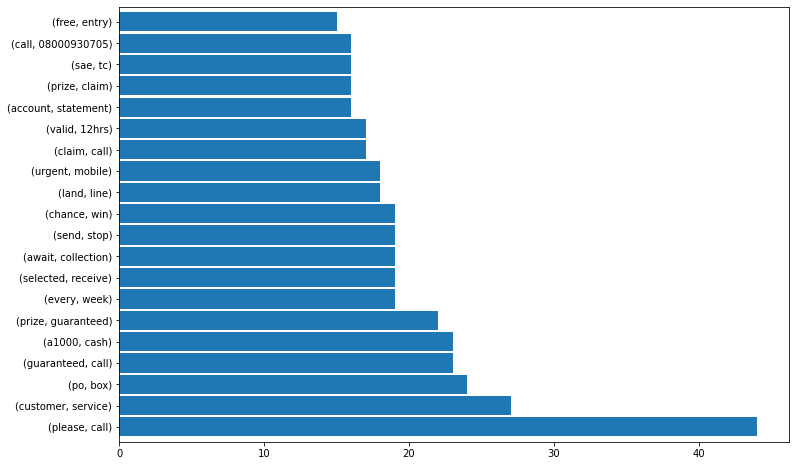

In [12]:
#Plot the occurrence of the most frequent bigrams
top_20_spam_bigrams.sort_values(ascending=False).plot.barh(width=0.9, figsize=(12, 8))

In [13]:
#Explore the to_dict method
top_20_spam_bigrams.to_dict()

{('please', 'call'): 44,
 ('customer', 'service'): 27,
 ('po', 'box'): 24,
 ('guaranteed', 'call'): 23,
 ('a1000', 'cash'): 23,
 ('prize', 'guaranteed'): 22,
 ('chance', 'win'): 19,
 ('send', 'stop'): 19,
 ('every', 'week'): 19,
 ('selected', 'receive'): 19,
 ('await', 'collection'): 19,
 ('land', 'line'): 18,
 ('urgent', 'mobile'): 18,
 ('claim', 'call'): 17,
 ('valid', '12hrs'): 17,
 ('account', 'statement'): 16,
 ('prize', 'claim'): 16,
 ('sae', 'tc'): 16,
 ('call', '08000930705'): 16,
 ('free', 'entry'): 15}

In [14]:
#Check the items inside the dictionary
top_20_spam_bigrams.to_dict().items()

dict_items([(('please', 'call'), 44), (('customer', 'service'), 27), (('po', 'box'), 24), (('guaranteed', 'call'), 23), (('a1000', 'cash'), 23), (('prize', 'guaranteed'), 22), (('chance', 'win'), 19), (('send', 'stop'), 19), (('every', 'week'), 19), (('selected', 'receive'), 19), (('await', 'collection'), 19), (('land', 'line'), 18), (('urgent', 'mobile'), 18), (('claim', 'call'), 17), (('valid', '12hrs'), 17), (('account', 'statement'), 16), (('prize', 'claim'), 16), (('sae', 'tc'), 16), (('call', '08000930705'), 16), (('free', 'entry'), 15)])

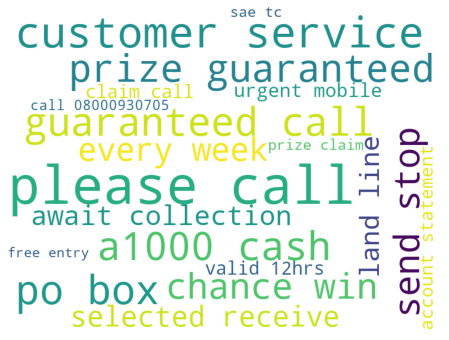

In [15]:
#Extract the words from the dictionary keys and plot the bigrams with a word cloud
spam_bigram_data = {k[0] + ' ' + k[1]: v for k, v in top_20_spam_bigrams.to_dict().items()}
spam_bigram_img = WordCloud(background_color='white', width=800, height=600).generate_from_frequencies(spam_bigram_data)
plt.figure(figsize=(10, 6))
plt.imshow(spam_bigram_img)
plt.axis('off')
plt.show()

In [16]:
#Define a function to automate plotting bigrams
def plot_bigrams(words):
    
    word_data = {k[0] + ' ' + k[1]: v for k, v in words.to_dict().items()}
    
    word_img = WordCloud(background_color='white', width=800, height=600).generate_from_frequencies(word_data)
    
    plt.figure(figsize=(10, 6))
    
    plt.imshow(word_img)
    
    plt.axis('off')
    
    plt.show()

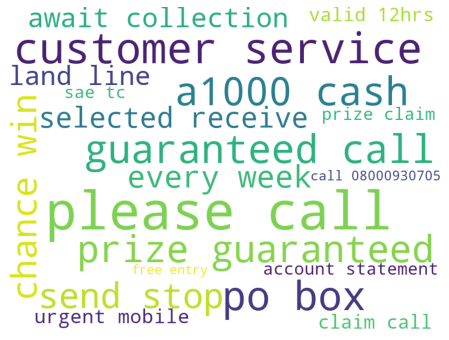

In [17]:
#Test my function
plot_bigrams(top_20_spam_bigrams)

## Exercise 1c

Is there any overlap in the bigrams for the spam data and the ham data?

In [18]:
#Create and store common bigrams from the ham data
top_20_ham_bigrams = make_ngrams(ham_words, 2)

top_20_ham_bigrams

(call, later)      52
(i'll, call)       44
(let, know)        42
(sorry, i'll)      39
(good, morning)    31
(new, year)        30
(take, care)       26
(ok, lor)          22
(pls, send)        22
(i'm, going)       21
(good, night)      19
(happy, new)       19
(hi, hi)           18
(wat, time)        18
(last, night)      18
(i'm, gonna)       17
(great, day)       17
(dont, know)       16
(send, message)    15
(want, come)       15
dtype: int64

In [19]:
#Create a dictionary of bigrams and frequency for the ham data
ham_bigram_data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham_bigrams.to_dict().items()}

In [20]:
#See if any common bigrams from spam are found in ham
overlap_list = [bigram for bigram in top_20_spam_bigrams.keys() if bigram in top_20_ham_bigrams.keys()]

overlap_list

[]

## Exercise 1d

Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [21]:
#Create trigrams from the spam corpus
top_20_spam_trigrams = make_ngrams(spam_words, 3)

top_20_spam_trigrams.head()

(prize, guaranteed, call)     21
(call, customer, service)     15
(land, line, claim)           14
(reply, call, 08000930705)    14
(2003, account, statement)    13
dtype: int64

<AxesSubplot:>

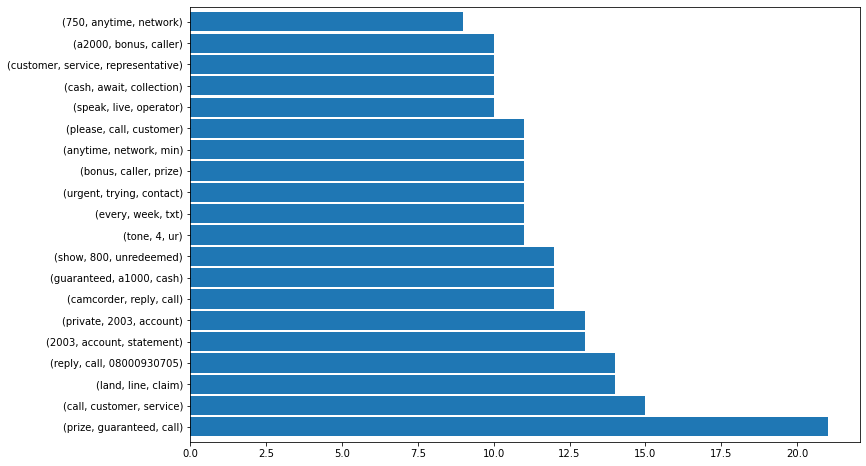

In [22]:
#Plot the occurrence of common trigrams
top_20_spam_trigrams.plot.barh(width=0.9, figsize=(12, 8))

In [23]:
#Create trigrams from the ham data
top_20_ham_trigrams = make_ngrams(ham_words, 3)

top_20_ham_trigrams.head()

(i'll, call, later)     41
(sorry, i'll, call)     38
(happy, new, year)      19
(pls, send, message)    13
(cant, pick, phone)     12
dtype: int64

<AxesSubplot:>

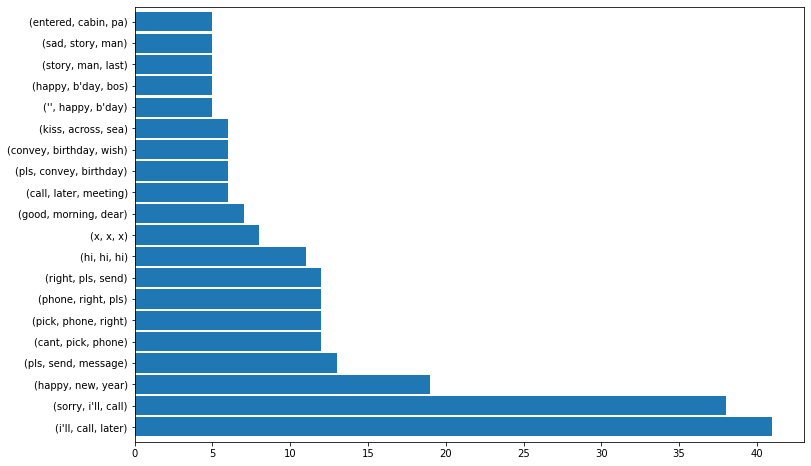

In [24]:
#Plot the occurrence
top_20_ham_trigrams.plot.barh(width=0.9, figsize=(12, 8))

In [25]:
#Create dictionaries from the trigram data
spam_trigram_data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_spam_trigrams.to_dict().items()}
ham_trigram_data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_ham_trigrams.to_dict().items()}

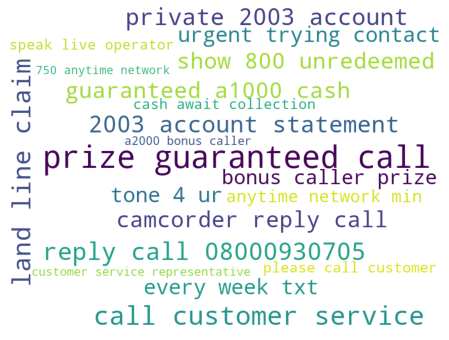

In [26]:
#Plot word clouds for spam trigrams
spam_trigram_img = WordCloud(background_color='white', width=800, height=600).generate_from_frequencies(spam_trigram_data)
plt.figure(figsize=(10, 6))
plt.imshow(spam_trigram_img)
plt.axis('off')
plt.show()

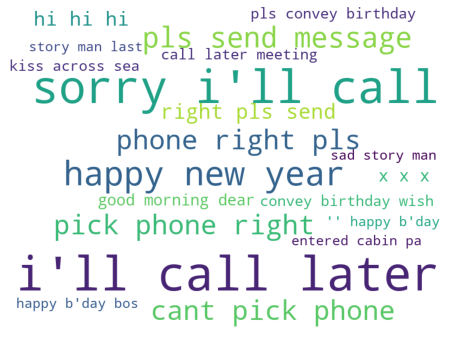

In [27]:
#Word cloud for ham trigrams
ham_trigram_img = WordCloud(background_color='white', width=800, height=600).generate_from_frequencies(ham_trigram_data)
plt.figure(figsize=(10, 6))
plt.imshow(ham_trigram_img)
plt.axis('off')
plt.show()

In [28]:
#Create a function to automate the process
def plot_trigrams(words):
    
    word_data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in words.to_dict().items()}
    
    word_img = WordCloud(background_color='white', width=800, height=600).generate_from_frequencies(word_data)
    
    plt.figure(figsize=(10, 6))
    
    plt.imshow(word_img)
    
    plt.axis('off')
    
    plt.show()

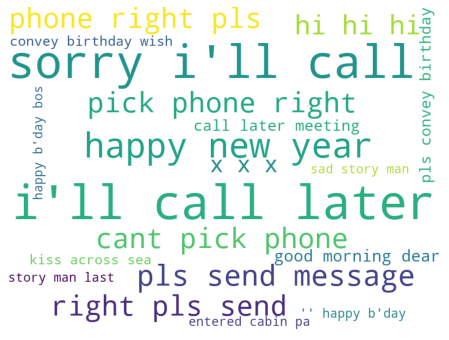

In [29]:
#Test
plot_trigrams(top_20_ham_trigrams)

## Exercise 2

Explore the blog articles using the techniques discussed in the exploration lesson.

In [30]:
#Read in the clean codeup blog articles
blog_df = pd.read_csv('clean_blog_posts.csv')

blog_df.head()

,title,date_published,content,clean,stemmed,lemmatized
0,Is a Career in Tech Recession-Proof?,"Aug 12, 2022","\nGiven the current economic climate, many eco...",given current economic climate many economists...,given current econom climat mani economist con...,given current economic climate many economist ...
1,Codeup X Superhero Car Show & Comic Con,"Aug 10, 2022",\nCodeup had a blast at the San Antonio Superh...,codeup blast san antonio superhero car show co...,codeup blast san antonio superhero car show co...,codeup blast san antonio superhero car show co...
2,What Jobs Can You Get After a Coding Bootcamp?...,"Aug 2, 2022",\nIf you’re considering a career in web develo...,youre considering career web development dont ...,your consid career web develop dont know expec...,youre considering career web development dont ...
3,Codeup’s New Dallas Campus,"Jul 25, 2022",\nCodeup’s Dallas campus has a new location! F...,codeups dallas campus new location two years c...,codeup dalla campu new locat two year codeup o...,codeups dallas campus new location two year co...
4,Codeup TV Commercial,"Jul 20, 2022",\nCodeup has officially made its TV debut! Our...,codeup officially made tv debut community stud...,codeup offici made tv debut commun student sta...,codeup officially made tv debut community stud...


In [31]:
#Join the words together into one body of text
blog_words = ' '.join(blog_df['lemmatized'])

(-0.5, 399.5, 199.5, -0.5)

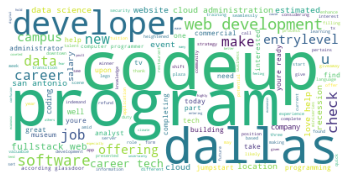

In [32]:
#Create a word cloud of 
blog_img = WordCloud(background_color='white').generate(blog_words)
plt.imshow(blog_img)
plt.axis('off')

In [33]:
#Create bigrams.. what's happening here?
top_20_blog_bigrams = make_ngrams(blog_words, 2)

top_20_blog_bigrams.head()

(e,  )    117
( , c)    108
(i, n)    105
(e, r)     96
(d,  )     85
dtype: int64

In [34]:
#Could a list of words be more appropriate?
list(blog_words.split())

['given',
 'current',
 'economic',
 'climate',
 'many',
 'economist',
 'considering',
 'u',
 'entering',
 'recession',
 'cause',
 'confusion',
 'fear',
 'uncertainty',
 'especially',
 'pertains',
 'job',
 'security',
 'ease',
 'feeling',
 'youll',
 'find',
 'career',
 'tech',
 'tend',
 'hold',
 'better',
 'others',
 'amid',
 'recession',
 'event',
 'recession',
 'company',
 'likely',
 'shift',
 'digital',
 'strategy',
 'making',
 'career',
 'tech',
 'valuable',
 'highly',
 'coveted',
 'programmerdeveloper',
 'matter',
 'programming',
 'language',
 'youve',
 'mastered',
 'knowledge',
 'alone',
 'make',
 'extremely',
 'valuable',
 'coding',
 'skill',
 'posse',
 'programmer',
 'developer',
 'indemand',
 'company',
 'looking',
 'build',
 'enhance',
 'website',
 'enhance',
 'consumer',
 'experience',
 'according',
 'u',
 'bureau',
 'labor',
 'statistic',
 'job',
 'software',
 'development',
 'expected',
 'grow',
 '22',
 '2030',
 'much',
 'faster',
 'average',
 'career',
 'cloud',
 'administ

In [35]:
#Make a list of words
blog_words = list(blog_words.split())

In [36]:
#Form bigrams. Is this expected performance now?
top_20_blog_bigrams = make_ngrams(blog_words, 2)

top_20_blog_bigrams.head()

(web, development)         9
(fullstack, web)           6
(career, tech)             6
(would, love)              5
(cloud, administration)    5
dtype: int64

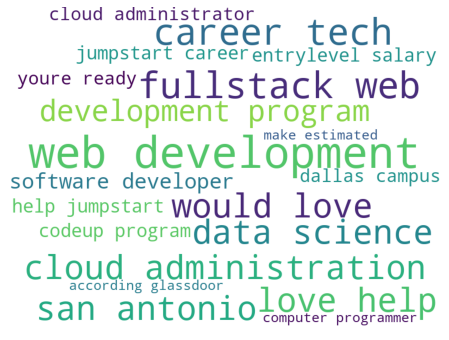

In [37]:
#Visualize the bigrams
plot_bigrams(top_20_blog_bigrams)

In [38]:
#Create trigrams
top_20_blog_trigrams = make_ngrams(blog_words, 3)

top_20_blog_trigrams.head()

(would, love, help)              5
(web, development, program)      4
(fullstack, web, development)    4
(love, help, jumpstart)          3
(help, jumpstart, career)        3
dtype: int64

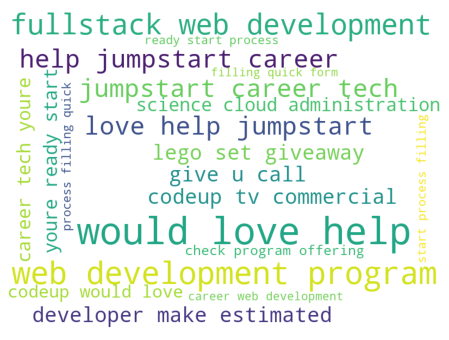

In [39]:
#Plot
plot_trigrams(top_20_blog_trigrams)

## Exercise 3

Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [40]:
#Read in the cleaned news articles
news_df = pd.read_csv('clean_articles.csv')

news_df.head()

,title,content,category,clean,stemmed,lemmatized
0,India's GDP grows at 13.5% in first quarter of...,India's GDP grew at 13.5% in the first quarter...,business,india ' gdp grew 135 first quarter fy23 achiev...,india ' gdp grew 135 first quarter fy23 achiev...,india ' gdp grew 135 first quarter fy23 achiev...
1,Musk seeks to delay Twitter trial to Nov amid ...,Tesla CEO Elon Musk is seeking to delay the tr...,business,tesla ceo elon musk seeking delay trial twitte...,tesla ceo elon musk seek delay trial twitter n...,tesla ceo elon musk seeking delay trial twitte...
2,"Snap to lay off 20% of staff, cancel several p...",Snap said on Wednesday it will lay off 20% of ...,business,snap said wednesday lay 20 staff shut original...,snap said wednesday lay 20 staff shut origin s...,snap said wednesday lay 20 staff shut original...
3,2 top executives at Snap quit hours after repo...,Two senior advertising executives at Snap quit...,business,two senior advertising executives snap quit ho...,two senior advertis execut snap quit hour repo...,two senior advertising executive snap quit hou...
4,Viral video shows Amazon parcels thrown out of...,A video from Guwahati railway station has gone...,business,video guwahati railway station gone viral show...,video guwahati railway station gone viral show...,video guwahati railway station gone viral show...


In [41]:
#Create a list of words only found in lemmatized business articles
business_words = list(' '.join(news_df[news_df['category'] == 'business']['lemmatized']).split())

business_words

['india',
 "'",
 'gdp',
 'grew',
 '135',
 'first',
 'quarter',
 'fy23',
 'achieving',
 'fastest',
 'annual',
 'expansion',
 'year',
 'government',
 'data',
 'showed',
 'however',
 'lower',
 'reserve',
 'bank',
 'india',
 "'",
 'rbi',
 'projection',
 '162',
 'gdp',
 'growth',
 'first',
 'quarter',
 'fy23',
 'india',
 "'",
 'gdp',
 'growth',
 'first',
 'quarter',
 'fy22',
 '201',
 'tesla',
 'ceo',
 'elon',
 'musk',
 'seeking',
 'delay',
 'trial',
 'twitter',
 'november',
 'per',
 'court',
 'filing',
 'fiveday',
 'trial',
 'currently',
 'scheduled',
 'start',
 'october',
 '17',
 'court',
 'filing',
 'came',
 'musk',
 "'",
 'legal',
 'team',
 'sent',
 'fresh',
 'letter',
 'twitter',
 'include',
 'whistleblower',
 'peiter',
 'zatko',
 "'",
 'claim',
 'another',
 'reason',
 'end',
 '44',
 'billion',
 'deal',
 'snap',
 'said',
 'wednesday',
 'lay',
 '20',
 'staff',
 'shut',
 'original',
 'show',
 'inapp',
 'game',
 'several',
 'project',
 'part',
 'corporate',
 'restructuring',
 'per',
 'ceo'

In [42]:
#Repeat the process for other categories
sports_words = list(' '.join(news_df[news_df['category'] == 'sports']['lemmatized']).split())
technology_words = list(' '.join(news_df[news_df['category'] == 'technology']['lemmatized']).split())
entertainment_words = list(' '.join(news_df[news_df['category'] == 'entertainment']['lemmatized']).split())

In [43]:
#What are my most frequent business words? Anything wrong here?
business_top_20 = pd.Series(business_words).value_counts().head(20)

business_top_20

'             29
billion       12
company       11
said          10
first          8
india          7
snap           7
million        7
net            6
report         6
investment     5
month          5
firm           5
bank           5
employee       4
imf            4
executive      4
service        4
two            4
tata           4
dtype: int64

In [44]:
#Repeat the process for the other categories
sports_top_20 = pd.Series(sports_words).value_counts().head(20)
technology_top_20 = pd.Series(technology_words).value_counts().head(20)
entertainment_top_20 = pd.Series(entertainment_words).value_counts().head(20)

In [45]:
#Remove the pesky apostrophe
business_top_20 = business_top_20.drop("'")
sports_top_20 = sports_top_20.drop("'")
technology_top_20 = technology_top_20.drop("'")
entertainment_top_20 = entertainment_top_20.drop("'")

In [46]:
#Compile my most frequent words from each category in one dataframe
top_words = pd.concat([pd.DataFrame(business_top_20).reset_index(),
                       pd.DataFrame(sports_top_20).reset_index(),
                       pd.DataFrame(technology_top_20).reset_index(),
                       pd.DataFrame(entertainment_top_20).reset_index()])

In [47]:
#Housecleaning
top_words.rename(columns={'index': 'word', 0: 'count'}, inplace=True)

top_words.head()

,word,count
0,billion,12
1,company,11
2,said,10
3,first,8
4,india,7


In [48]:
#Are any words frequently used across multiple subjects?
top_words['word'].value_counts().head(20)

said          4
firm          2
report        2
two           2
service       2
stated        2
company       2
investment    2
added         2
one           2
million       2
snap          2
india         2
app           1
actress       1
reported      1
reward        1
data          1
case          1
battery       1
Name: word, dtype: int64

In [49]:
#Many frequently occurring words look business/technology related..
for word in list(business_top_20.index):
    
    if word in list(technology_top_20.index):
        
        print('Match found with word: {}!'.format(word))
        
    else:
        
        continue

Match found with word: company!
Match found with word: said!
Match found with word: snap!
Match found with word: million!
Match found with word: report!
Match found with word: investment!
Match found with word: firm!
Match found with word: service!
Match found with word: two!


In [50]:
#Create bigrams from each category's words
business_bigrams = make_ngrams(business_words, 2)
sports_bigrams = make_ngrams(sports_words, 2)
technology_bigrams = make_ngrams(technology_words, 2)
entertainment_bigrams = make_ngrams(entertainment_words, 2)

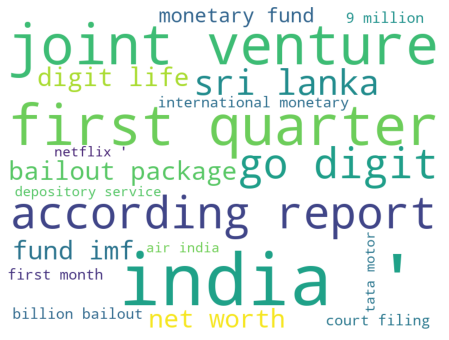

In [51]:
#Plot business
plot_bigrams(business_bigrams)

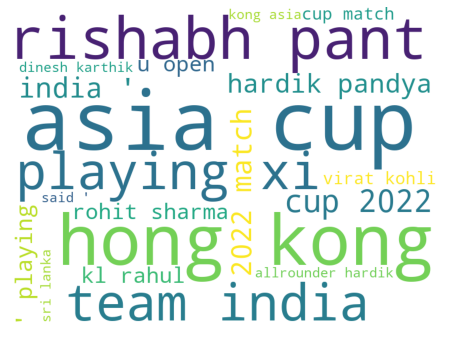

In [52]:
#Plot sports
plot_bigrams(sports_bigrams)

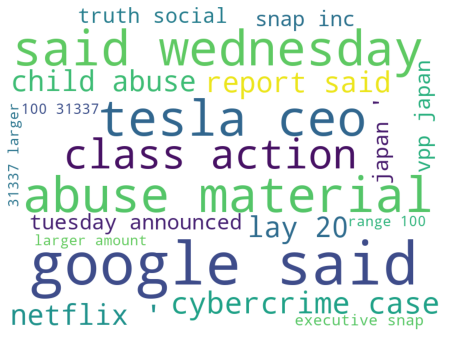

In [53]:
#Plot technology
plot_bigrams(technology_bigrams)

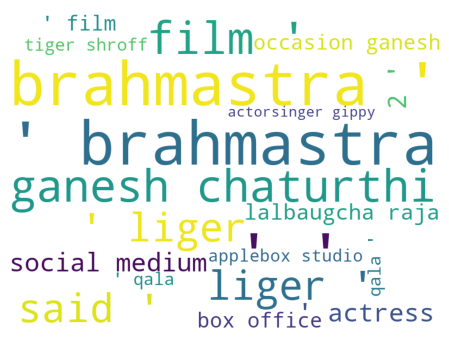

In [54]:
#Plot entertainment
plot_bigrams(entertainment_bigrams)